In [15]:
from pandas import read_csv
from matplotlib import pyplot
from numpy import log
from statsmodels.tsa.stattools import adfuller

### Stationary time series

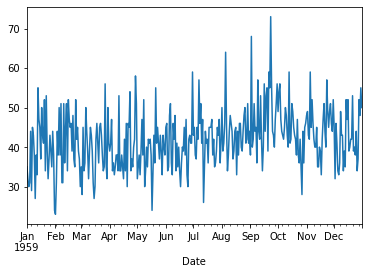

In [4]:
stationary_series = read_csv('datasets/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
stationary_series.plot()
pyplot.show()

### Non-stationary time series

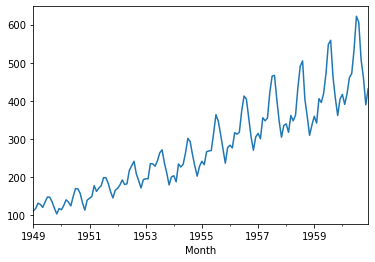

In [5]:
non_stationary_series = read_csv('datasets/airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
non_stationary_series.plot()
pyplot.show()

### Notions of stationarity
* **Stationary Process**: A process that generates a stationary series of observations.
* **Stationary Model**: A model that describes a stationary series of observations.
* **Trend Stationary**: A time series that does not exhibit a trend.
* **Seasonal Stationary**: A time series that does not exhibit seasonality.
* **Strictly Stationary**: A mathematical definition of a stationary process, specifically that the joint distribution of observations is invariant to time shift

### Summary Statistics
Split your time series into two (or more) partitions and compare the mean and variance of each group. If they differ and the difference is statistically significant, the time series is likely non-stationary. 

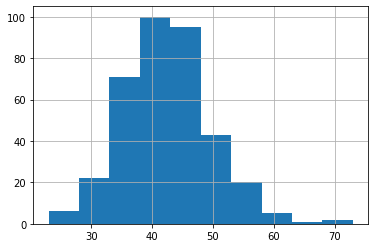

In [6]:
stationary_series.hist()
pyplot.show()

In [8]:
# Summary statistics for stationary time series

X = stationary_series.values
split = int(len(X)/2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=39.763736, mean2=44.185792
variance1=49.213410, variance2=48.708651


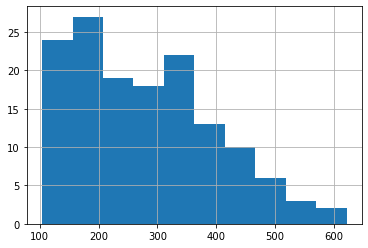

In [10]:
non_stationary_series.hist()
pyplot.show()

In [9]:
# Summary statistics for non-stationary time series

X = non_stationary_series.values
split = int(len(X)/2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191


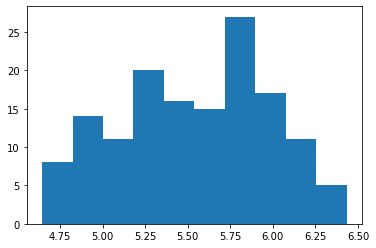

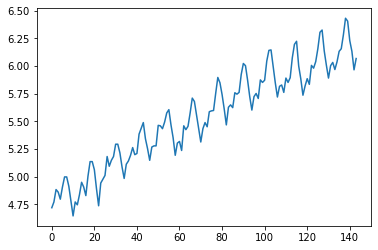

mean1=5.175146, mean2=5.909206
variance1=0.068375, variance2=0.049264


In [14]:
# Log transformed non-stationary time series
# Exponential growth diminishes but still have a trend and seasonal elements

X = non_stationary_series.values
X = log(X)
pyplot.hist(X)
pyplot.show()
pyplot.plot(X)
pyplot.show()

# Summary statistics for transformed non-stationary time series
split = int(len(X)/2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

### Augmented Dickey-Fuller test

It uses an autoregressive model and optimizes an information criterion across multiple different lag values. The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

In [17]:
# Stationarity test on stationary time series

result = adfuller(stationary_series)
print('ADF statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF statistic: -4.808291
p-value: 0.000052
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


In [18]:
# Stationarity test on non stationary time series

result = adfuller(non_stationary_series)
print('ADF statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


The test statistic is positive, meaning we are much less likely to reject the null hypothesis (it looks non-stationary). 

In [19]:
# Stationarity test on log transformed non stationary time series

X = log(non_stationary_series)
result = adfuller(X)
print('ADF statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF statistic: -1.717017
p-value: 0.422367
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


The value is larger than the critical values, again, meaning that we fail to reject the null hypothesis and in turn that the time series is non-stationary.